In [1]:
import pandas as pd
dataset = pd.read_csv("Ts-OHLC.csv")
dataset

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [2]:
column = "Close"

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (2225, 1)


In [4]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

RMSE-Testset: 0.32396689611601376
maPe-Testset: 0.9995505617977528


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.1680841130388499
maPe-Testset: 3455747580.0918345
RMSE-Testset: 0.022872630233257127
maPe-Testset: 2362967158.0876946
RMSE-Testset: 0.02288594565997708
maPe-Testset: 2377525502.620591


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


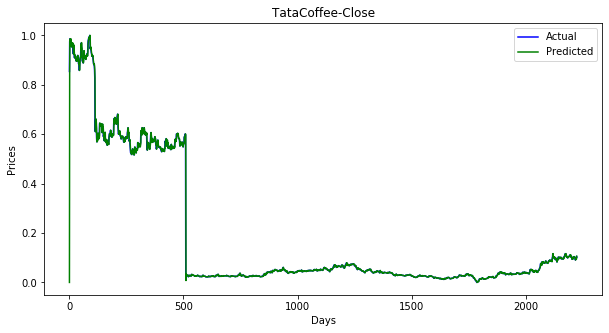

In [5]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [6]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [7]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

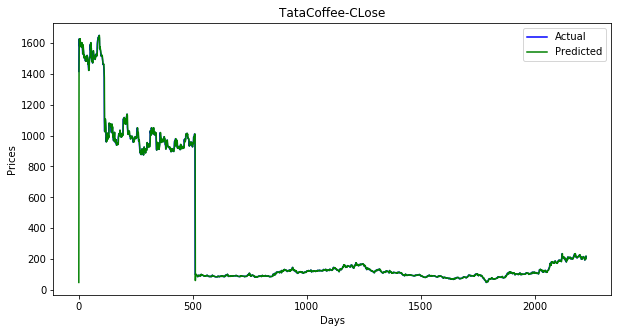

In [8]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [9]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 36.59004992117135
maPe-Testset: 0.019497032038513926


In [10]:
forecast=model_fit.predict(len(data1), len(data1)+100)

In [11]:
forecast

array([0.10170667, 0.10171637, 0.10171593, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171595,
       0.10171595, 0.10171595, 0.10171595, 0.10171595, 0.10171

In [12]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [13]:
forecast_stock_price_test_oriF.to_csv("Close_SARIMA.csv",index=False)

In [14]:
forecast_stock_price_test_oriF

,Closefore
0,212.008629
1,212.024134
2,212.023429
3,212.023461
4,212.02346
...,...
96,212.02346
97,212.02346
98,212.02346
99,212.02346
